# Time Stepping

In this worksheet we will discuss various time stepping techniques and its impact on the resulting solution.
We take an example of a simple pendulum and solve it using Explicit euler and implicit euler methods. We observe the disadvantages of the aforementioned methods. Then, we solve the same problem using Stormer-Verlet method.

Finally we discuss the advantages and disadvantages of all the methods.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Modelling

Let us consider an example of a "Simple Pendulum", with a ball of mass $m$, attached to string of length $r$. Let us reprensent acceleration due to gravity with $g$. The free body diagram (or the force diagram) is a following
<p align="center">
<img src="./figures/pendulum1.png"
     alt="Pendulum Force Diagram"
     width="256" height="256"/>
</p>
Let $v_{\theta}$ be tangential velocity. 
Using Newton's second law we can write following:
\begin{align}
m\frac{dv_{\theta}}{dt} &= -mg sin \theta \\
\frac{dv_{\theta}}{dt} &= -g sin \theta \label{eq:force-equation_1} \tag{1}
\end{align}
Taylor exapansion of $sin \theta$ is as following:
\begin{align}
sin \theta &= \theta - \frac{\theta^3}{3!} +  \frac{\theta^5}{5!} - \frac{\theta^7}{7!} + ...\\
&= \sum_{n=0}^{\infty} \frac{{(-1)}^n}{(2n+1)!} \theta^{2n+1}
\end{align}
For small angle $\theta$ we can ignore the higher order terms and approximate $sin \theta \approx \theta$. On substituting this in equation \ref{eq:force-equation_1}, we get:
\begin{align}
\frac{dv_{\theta}}{dt} &= -g \theta \label{eq:force-equation} \tag{2}
\end{align}
Rate of change of angle (angular velocity) can be written as following:
\begin{align}
\frac{d \theta}{dt} = \frac{v_{\theta}}{r} \label{eq:velocity-equation} \tag{3}
\end{align}
The equation \ref{eq:force-equation} and \ref{eq:velocity-equation} can be summarised in matrix notation as following:
$$\begin{pmatrix} 
\frac{d \theta}{dt} \\
\frac{dv_{\theta}}{dt}
\end{pmatrix} = 
\begin{pmatrix} 
0 & \frac{1}{r} \\
-g & 0
\end{pmatrix}
\begin{pmatrix} 
\theta \\
v_{\theta}
\end{pmatrix} \label{eq:diff_eqn} \tag{4}$$
Above equation can be expressed in following form:
$$\frac{dX}{dt} = AX$$
where $X = \begin{pmatrix} 
\theta \\
v_{\theta}
\end{pmatrix}$ and $A = \begin{pmatrix} 
0 & \frac{1}{r} \\
-g & 0
\end{pmatrix}$

# Problem Statement

Let us consider a simple pendulum problem with mass $m=1.0\ \text{kg}$, length of string as $r = 1.0 \ \text{m}$.
The initial conditions ($t = 0$) are $\theta = 0\ \text{radians}$  and $v_{\theta} = 0.1\ \frac{\text{m}}{\text{s}}$ 

## Analytical Solution 
If $\theta (t)$ and $v_\theta (t)$ represents the solution at time $t$, the analytical solution is:
\begin{align}
\theta(t) &= \theta(0) + \frac{v_\theta (0)}{\sqrt {gr}}sin \big(\sqrt\frac{g}{r}t \big) \\
v_\theta(t) &= v_\theta (0)\ cos \big(\sqrt\frac{g}{r}t \big) \label{eq:analytical} \tag{5}
\end{align}

### Task 1:
Provide the derivation of the analytical solution 

We take derivative with respect to time on both the sides of equation (3)
$$\frac{d^2 \theta}{dt^2} =- \frac{1}{r}\frac{dv_{\theta}}{dt} \implies \frac{d^2 \theta}{dt^2} + \frac{1}{r}\frac{dv_{\theta}}{dt} = 0 \tag{5}$$
Now we substitute the value of $\frac{dv_{\theta}}{dt}$ from equation (2) in the equation above:
$$\frac{d^2 \theta}{dt^2} + \frac{g \theta}{r} = 0 \tag{6}$$
Equation (6) is a classical Simple harmonic motion(SHM). SHM has following form:
$$\frac{d^2 x}{dt^2} + \omega^2 x = 0 \tag{7}$$
solution of SHM is:
$$x(t) = C_1 sin (\omega t) + C_2 \tag{8}$$
where $C_1$ and $C_2$ are constants determined by initial condition. Based on this, we can determine solution of equation (6) as
$$\theta (t) = C_1 sin(\sqrt{\frac{g}{r}}t) + C_2 \tag{9}$$
At $t=0$, $\theta = \theta(0)$. On substituting this in equation (9) we get $C_2 = \theta (0)$
<br/>
By definition of tangential velocity($v_{\theta}$):
$$v_{\theta} = r\frac{d \theta}{dt}$$
Substituting the solution from equation (9) in equation above, we get
$$v_{\theta}(t) = r C_1 \sqrt{\frac{g}{r}} cos(\frac{g}{r}t) = C_1 \sqrt{gr}cos(\frac{g}{r}t) \tag{10}$$
At $t=0$, $v_\theta = v_\theta(0)$. On substituting this in equation (10) we get $C_2 = \frac{v_\theta(0)}{\sqrt{gr}} $
On substituting value of $C_1$ and $C_2$ in equation (9) and (10), we get
\begin{align}
\theta(t) &= \theta(0) + \frac{v_\theta (0)}{\sqrt {gr}}sin \big(\sqrt\frac{g}{r}t \big) \\
v_\theta(t) &= v_\theta (0)\ cos \big(\sqrt\frac{g}{r}t \big) \label{eq:analytical}
\end{align}

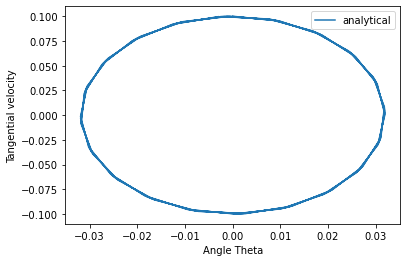

In [2]:
init_condition = np.array([0, 0.1])

def analytical_solution(init_condition, dt=0.1, time_steps=100, g=9.81, r=1):
    output = []
    output.append(init_condition)
    for i in range(1, time_steps+1):
        t = dt * i
        theta = init_condition[0] + (init_condition[1] * np.sin(np.sqrt(g/r) * t)/ (np.sqrt(g*r)))
        velocity = init_condition[1] * np.cos(np.sqrt(g/r) * t)
        output.append(np.array([theta, velocity]))
    return output

def extract_result(output):
    theta = np.zeros(len(output), dtype=float)
    velocity = np.zeros(len(output), dtype=float)
    for i in range(len(output)):
        theta[i] = output[i][0]
        velocity[i] = output[i][1]
    return theta, velocity

output_analytical = analytical_solution(init_condition)
theta_analytical, velocity_analytical = extract_result(output_analytical)
plt.plot(theta_analytical, velocity_analytical, label='analytical')
plt.legend(loc='upper right')
plt.xlabel('Angle Theta')
plt.ylabel('Tangential velocity')
plt.show()

## Numerical Solution

### Explicit Euler

Firstly, we will discuss explicit euler. <br />
If $\Delta t$ is the step size, the the soultion of equation (4) at time $t$ can be written as 
\begin{align}
X(t) &= X(t-1) + A \Delta tX(t-1) \\
&= (I + A \Delta t)X(t-1)
\end{align}
where $I$ is the identity matrix

### Task 2:
Implement the explicit euler method

In [3]:
A = np.array([[0., 1.], [-9.81, 0.]])

In [4]:
# %load solution_task2_explEuler.py
def explicit_euler(A, init_condition, time_steps=1, dt=0.1):
    output = []
    I = np.eye(A.shape[0])
    output.append(init_condition)
    # TODO: implement the explicit euler method
    # In each time step, the new solution for the position should be appended to output.
    ########################## TODO BEGINS ##########################

    for i in range(time_steps):
        solution = np.matmul((I + A*dt ), output[-1])
        output.append(solution)
    ########################### TODO ENDS ###########################
    return output


### Implicit Euler

Now, we will discuss implicit euler. <br />
If $\Delta t$ is the step size, the the soultion of equation (4) at time $t$ can be written as 
\begin{align}
X(t) &= X(t-1) + A \Delta tX(t) \\
&= (I - A \Delta t)^{-1}X(t-1)
\end{align}
where $I$ is the identity matrix


### Task 3:
Implement the implicit euler method

In [5]:
# %load solution_task3_implEuler.py
def implicit_euler(A, init_condition, time_steps=1, dt=0.1):
    output = []
    I = np.eye(A.shape[0])
    output.append(init_condition)
    # TODO: implement the implicit euler method
    # In each time step, the new solution for the position should be appended to output.
    ########################## TODO BEGINS ##########################
    for i in range(time_steps):
        solution = np.linalg.solve((I - A*dt ), output[-1])
        output.append(solution)

    ########################### TODO ENDS ###########################
    return output


The following is a visualization of the explicit and implicit euler method for the pendulum. What behavior do you expect?

Explore the effect of different time step sizes.

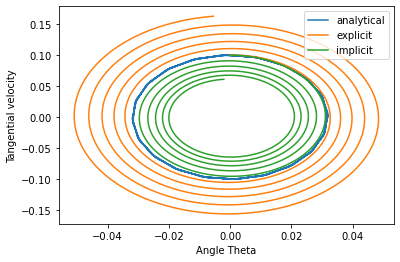

In [6]:
output_explicit = explicit_euler(A, init_condition, time_steps=1000, dt=.01)
output_implicit = implicit_euler(A, init_condition, time_steps=1000, dt=.01)

def extract_result(output):
    theta = np.zeros(len(output), dtype=float)
    velocity = np.zeros(len(output), dtype=float)
    for i in range(len(output)):
        theta[i] = output[i][0]
        velocity[i] = output[i][1]
    return theta, velocity

theta_explicit, velocity_explicit = extract_result(output_explicit)
theta_implicit, velocity_implicit = extract_result(output_implicit)
theta_analytical, velocity_analytical = extract_result(output_analytical)
plt.plot(theta_analytical, velocity_analytical, label='analytical')
plt.plot(theta_explicit, velocity_explicit, label='explicit')
plt.plot(theta_implicit, velocity_implicit, label='implicit')
plt.xlabel('Angle Theta')
plt.ylabel('Tangential velocity')
plt.legend(loc='upper right')
plt.show()

### Velocity Störmer Verlet Method

Let $\vec{r}$, $\vec{v}$ and $\vec{a}$ denote the position, velocity and acceleration respectively. <br />
Velocity Störmer Verlet Method consists of folliwng steps:
1. Using the postions $\vec{r}(t)$ at time $t$ calculate acceleration $\vec{a}$
2. Update postion using second order Taylor expansion
$$\vec{r}(t + \Delta t) = \vec{r}(t) + \Delta t \vec{v} (t) + \frac{\Delta t^2}{2} \vec{a}(t)$$
3. Calculate acceleration at time $t+ \Delta t$
4. Update the velocity using Crank-Nicolson method
$$\vec{v}(t + \Delta t) = \vec{v}(t) + \frac{\Delta t}{2}(\vec{a}(t) + \vec{a}(t + \Delta t))$$

The steps can be summarised in the following diagram:

In the example of simple pendulum, $\vec{r}$ is equivalent to $\theta$ and $\vec{v}$ is equivalent to $v_\theta$.
The mass of the ball is equal to 1 kilogram. So, acceleration is expressed as $\vec{a} = -g \theta$


### Task 4:
Implement the Velocity Störmer Verlet Method

In [7]:
# %load solution_task4_strVerl.py
def stormer_verlet(init_condition, time_steps=10, dt=.1, g=9.81, r=1):
    output = []
    output.append(init_condition)
    # TODO: implement the Velocity Störmer Verlet method
    # In each time step, the new solution for the position and velocity should be appended to output.
    ########################## TODO BEGINS ##########################
    for i in range(time_steps):
            force_t = -1.0 * g * output[-1][0] 
            solution_pos = output[-1][0] + (dt * output[-1][1] / r) + (0.5 * dt**2 * force_t)
            force_t_dt = -1.0 * g * solution_pos
            solution_vel = output[-1][1] + ((0.5 * dt) * (force_t + force_t_dt))
            output.append(np.array([solution_pos, solution_vel]))

    ########################### TODO ENDS ###########################
    return output


The following is a visualization of the explicit and implicit euler method for the pendulum. What behavior do you expect?

Explore the effect of different time step sizes.

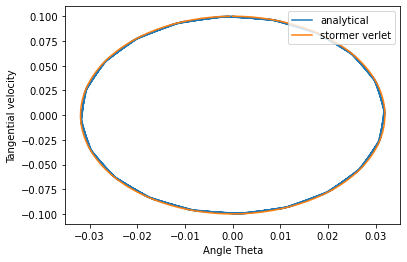

In [8]:
output_stormer = stormer_verlet(init_condition, time_steps=200, dt=.01)

theta_explicit, velocity_explicit = extract_result(output_explicit)
output_analytical = analytical_solution(init_condition)
theta_analytical, velocity_analytical = extract_result(output_analytical)
plt.plot(theta_analytical, velocity_analytical, label='analytical')
# theta_implicit, velocity_implicit = extract_result(output_implicit)
theta_stormer, velocity_stormer = extract_result(output_stormer)
# plt.plot(theta_explicit, velocity_explicit, label='explicit')
# plt.plot(theta_implicit, velocity_implicit, label='implicit')
plt.plot(theta_stormer, velocity_stormer, label='stormer verlet')
plt.legend(loc='upper right')
plt.xlabel('Angle Theta')
plt.ylabel('Tangential velocity')
plt.show()